<img src="../images/globus-logo.png" width=250 alt="Globus logo"></img>
<img src="../images/esgf.png" width=250 alt="ESGF logo"></img>

# ENSO Calculations using Globus Compute

## Overview

In this workflow, we combine topics covered in previous Pythia Foundations and CMIP6 Cookbook content to compute the [Niño 3.4 Index](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni) to multiple datasets, with the primary computations occuring on a remote machine. As a refresher of what the ENSO 3.4 index is, please see the following text, which is also included in the [ENSO Xarray](https://foundations.projectpythia.org/core/xarray/enso-xarray.html) content in the Pythia Foundations content.

> Niño 3.4 (5N-5S, 170W-120W): The Niño 3.4 anomalies may be thought of as representing the average equatorial SSTs across the Pacific from about the dateline to the South American coast. The Niño 3.4 index typically uses a 5-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more.

> Niño X Index computation: a) Compute area averaged total SST from Niño X region; b) Compute monthly climatology (e.g., 1950-1979) for area averaged total SST from Niño X region, and subtract climatology from area averaged total SST time series to obtain anomalies; c) Smooth the anomalies with a 5-month running mean; d) Normalize the smoothed values by its standard deviation over the climatological period.

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)

The previous cookbook, we ran this in a single notebook locally. In this example, we aim to execute the workflow on a remote machine, with only the visualizion of the dataset occuring locally.

The overall goal of this tutorial is to introduce the idea of functions as a service with Globus, and how this can be used to calculate ENSO indices.

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Xarray](https://foundations.projectpythia.org/core/xarray/xarray-intro.html) | Necessary | |
| [hvPlot Basics](https://hvplot.holoviz.org/getting_started/hvplot.html) | Necessary | Interactive Visualization with hvPlot |
| [Understanding of NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf.html) | Helpful | Familiarity with metadata structure |
| [Calculating ENSO with Xarray](https://foundations.projectpythia.org/core/xarray/enso-xarray.html) | Neccessary | Understanding of Masking and Xarray Functions |
| Dask | Helpful | |

- **Time to learn**: 30 minutes

## Imports

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
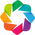

In [131]:
import hvplot.xarray
import holoviews as hv
import numpy as np
import hvplot.xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from intake_esgf import ESGFCatalog
import xarray as xr
import cf_xarray
import warnings
import os
from globus_compute_sdk import Executor, Client
warnings.filterwarnings("ignore")

hv.extension("bokeh")

## Accessing our Data and Computing the ENSO 3.4 Index
As mentioned in the introduction, we are utilizing functions from the previous ENSO notebooks. In order to run these with Globus Compute, we need to comply with the following requirements
- All libraries/packages used in the function need to be installed on the globus compute endpoint
- All functions/libraries/packages need to be imported and defined within the function to execute
- The output from the function needs to serializable (ex. xarray.Dataset, numpy.array)

Using these constraints, we setup the following function, with the key parameter being which modeling center (model) to compare. Two examples here include The National Center for Atmospheric Research (NCAR) and the Model for Interdisciplinary Research on Climate (MIROC).

In [121]:
def run_plot_enso(model, return_path=False):
    import numpy as np
    import matplotlib.pyplot as plt
    from intake_esgf import ESGFCatalog
    import xarray as xr
    import cf_xarray
    import warnings
    warnings.filterwarnings("ignore")

    def search_esgf(institution_id, grid='gn'):

        # Search and load the ocean surface temperature (tos)
        cat = ESGFCatalog()
        cat.search(
            activity_id="CMIP",
            experiment_id="historical",
            institution_id=institution_id,
            variable_id=["tos"],
            member_id='r11i1p1f1',
            table_id="Omon",
        )
        try:
            tos_ds = cat.to_datatree()[grid].to_dataset()
        except ValueError:
            tos_ds = cat.to_dataset_dict()[""]

        # Search and load the ocean grid cell area
        cat = ESGFCatalog()
        cat.search(
            activity_id="CMIP",
            experiment_id="historical",
            institution_id=institution_id,
            variable_id=["areacello"],
            member_id='r11i1p1f1',
        )
        try:
            area_ds = cat.to_datatree()[grid].to_dataset()
        except ValueError:
            area_ds = cat.to_dataset_dict()[""]
        return xr.merge([tos_ds, area_ds])

    def calculate_enso(ds):

        # Subset the El Nino 3.4 index region
        dso = ds.where(
        (ds.cf["latitude"] < 5) & (ds.cf["latitude"] > -5) & (ds.cf["longitude"] > 190) & (ds.cf["longitude"] < 240), drop=True
        )

        # Calculate the monthly means
        gb = dso.tos.groupby('time.month')

        # Subtract the monthly averages, returning the anomalies
        tos_nino34_anom = gb - gb.mean(dim='time')

        # Determine the non-time dimensions and average using these
        non_time_dims = set(tos_nino34_anom.dims)
        non_time_dims.remove(ds.tos.cf["T"].name)
        weighted_average = tos_nino34_anom.weighted(ds["areacello"]).mean(dim=list(non_time_dims))

        # Calculate the rolling average
        rolling_average = weighted_average.rolling(time=5, center=True).mean()
        std_dev = weighted_average.std()
        return rolling_average / std_dev

    def add_enso_thresholds(da, threshold=0.4):

        # Conver the xr.DataArray into an xr.Dataset
        ds = da.to_dataset()

        # Cleanup the time and use the thresholds
        try:
            ds["time"]= ds.indexes["time"].to_datetimeindex()
        except:
            pass
        ds["tos_gt_04"] = ("time", ds.tos.where(ds.tos >= threshold, threshold).data)
        ds["tos_lt_04"] = ("time", ds.tos.where(ds.tos <= -threshold, -threshold).data)

        # Add fields for the thresholds
        ds["el_nino_threshold"] = ("time", np.zeros_like(ds.tos) + threshold)
        ds["la_nina_threshold"] = ("time", np.zeros_like(ds.tos) - threshold)

        return ds
    
    ds = search_esgf("NCAR")
    enso_index = add_enso_thresholds(calculate_enso(ds).compute())
    enso_index.attrs = ds.attrs
    enso_index.attrs["model"] = model

    return enso_index

## Configure Globus Compute

Now that we have our functions, we can move toward using [Globus Flows](https://www.globus.org/globus-flows-service) and [Globus Compute](https://www.globus.org/compute).

Globus Flows is a reliable and secure platform for orchestrating and performing research data management and analysis tasks. A flow is often needed to manage data coming from instruments, e.g., image files can be moved from local storage attached to a microscope to a high-performance storage system where they may be accessed by all members of the research project.

More examples of creating and running flows can be found on our [demo instance](https://jupyter.demo.globus.org/hub/).

### Setup a Globus Compute Endpoint
Globus Compute (GC) is a service that allows **python functions** to be sent to remote points, executed, with the output from that function returned to the user. While there are a collection of endpoints already installed, we highlight in this section the steps required to configure for yourself. This idea is also known as "serverless" computing, where users do not need to think about the underlying infrastructure executing the code, but rather submit functions to be run and returned.

To start a GC endpoint at your system you need to login, [configure a conda environment](https://foundations.projectpythia.org/foundations/how-to-run-python.html#installing-and-managing-python-with-conda), and `pip install globus-compute-endpoint`.

You can then run:

```globus-compute-endpoint configure esgf-test```

```globus-compute-endpoint start esgf-test```

Note that by default your endpoint will execute tasks on the login node (if you are using a High Performance Compute System). Additional configuration is needed for the endpoint to provision compute nodes. For example, here is the documentation on configuring globus compute endpoints on the Argonne Leadership Computing Facility's Polaris system
- https://globus-compute.readthedocs.io/en/latest/endpoints.html#polaris-alcf

In [133]:
endpoint_id = "b3d1d669-d49b-412e-af81-95f3368e525c"

### Setup an Executor to Run our Functions
Once we have our compute endpoint ID, we need to pass this to our executor, which will be used to pass our functions from our local machine to the machine we would like to compute on.

In [135]:
gce = Executor(endpoint_id=endpoint_id)
gce

Executor<ep_id:b3d1d669-d49b-412e-af81-95f3368e525c; tg_id:None; bs:128>

### Test our Functions
Now that we have our functions prepared, and an executor to run on, we can test them out using our endpoint!

We pass in our function name, and the additional arguments for our functions. For example, let's look at comparing at the NCAR and MIROC modeling center's CMIP6 simulations.

In [136]:
ncar_task = gce.submit(run_plot_enso, model='NCAR')
miroc_task = gce.submit(run_plot_enso, model='MIROC')

The results are started as python objects, with the resultant datasets available using `.result()`

In [137]:
ncar_ds = ncar_task.result()
miroc_ds = miroc_task.result()

ncar_ds

<xarray.Dataset>
Dimensions:            (time: 1980)
Coordinates:
  * time               (time) datetime64[ns] 1850-01-15T13:00:00.000008 ... 2...
    month              (time) int64 1 2 3 4 5 6 7 8 9 ... 4 5 6 7 8 9 10 11 12
Data variables:
    tos                (time) float32 nan nan 0.06341 ... 0.7921 nan nan
    tos_gt_04          (time) float32 0.4 0.4 0.4 0.4 ... 0.6829 0.7921 0.4 0.4
    tos_lt_04          (time) float32 -0.4 -0.4 -0.4 -0.4 ... -0.4 -0.4 -0.4
    el_nino_threshold  (time) float32 0.4 0.4 0.4 0.4 0.4 ... 0.4 0.4 0.4 0.4
    la_nina_threshold  (time) float32 -0.4 -0.4 -0.4 -0.4 ... -0.4 -0.4 -0.4
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/b0ffb89d-095d-4533-a159-a2e1241ff138
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    model:                  NCAR

### Plot our Data
Now that we have pre-computed datasets, the last step is to visualize the output. In the other example, we stepped through how to utilize the `.hvplot` tool to create interactive displays of ENSO values. We will utilize that functionality here, wrapping into a function.

In [138]:
def plot_enso(ds):
    el_nino = ds.hvplot.area(x="time", y2='tos_gt_04', y='el_nino_threshold', color='red', hover=False)
    el_nino_label = hv.Text(ds.isel(time=40).time.values, 2, 'El Niño').opts(text_color='red',)

    # Create the La Niña area graphs
    la_nina = ds.hvplot.area(x="time", y2='tos_lt_04', y='la_nina_threshold', color='blue', hover=False)
    la_nina_label = hv.Text(ds.isel(time=-40).time.values, -2, 'La Niña').opts(text_color='blue')

    # Plot a timeseries of the ENSO 3.4 index
    enso = ds.tos.hvplot(x='time', line_width=0.5, color='k', xlabel='Year', ylabel='ENSO 3.4 Index')

    # Combine all the plots into a single plot
    return (el_nino_label * la_nina_label * el_nino * la_nina * enso).opts(title=f'{ds.attrs["model"]} {ds.attrs["source_id"]} \n Ensemble Member: {ds.attrs["variant_label"]}')

Once we have the function, we apply to our two datasets and combine into a single column.

In [139]:
(plot_enso(ncar_ds) + plot_enso(miroc_ds)).cols(1)

:Layout
   .Overlay.I  :Overlay
      .Text.I  :Text   [x,y]
      .Text.II :Text   [x,y]
      .Area.I  :Area   [time]   (el_nino_threshold,tos_gt_04)
      .Area.II :Area   [time]   (la_nina_threshold,tos_lt_04)
      .Curve.I :Curve   [time]   (tos)
   .Overlay.II :Overlay
      .Text.I  :Text   [x,y]
      .Text.II :Text   [x,y]
      .Area.I  :Area   [time]   (el_nino_threshold,tos_gt_04)
      .Area.II :Area   [time]   (la_nina_threshold,tos_lt_04)
      .Curve.I :Curve   [time]   (tos)

## Summary
In this notebook, we applied the ENSO 3.4 index calculations to CMIP6 datasets remotely using Globus Compute and created interactive plots comparing where we see El Niño and La Niña.

### What's next?
We will see some more advanced examples of using the CMIP6 and other data access methods as well as computations.

## Resources and references
- [Intake-ESGF Documentation](https://github.com/nocollier/intake-esgf)
- [Globus Compute Documentation](https://www.globus.org/compute)